In [174]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sql_functions as sf
from transform_esg import melt_pivot 
from transform_esg import interpol
from transform_esg import lin_reg
from transform_esg import per_null
from transform_esg import nan_scanner_comb

In [175]:
#plot Style
sns.set_style("whitegrid")

In [176]:
df_esg = pd.read_csv('data/sovereignesg-data_2022.csv', sep=';')


/var/folders/lq/66qmb5qs6yx8s8h1s8rmqnh80000gn/T/ipykernel_3074/749654921.py:1: DtypeWarning: Columns (2,3,4,5,6,7,9,10,11,15,16,17,19,20,22,26,29,30,31,32,33,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df_esg = pd.read_csv('data/sovereignesg-data_2022.csv', sep=';')


In [177]:
df_esg.head()

,iso3,ind,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407,58.010906,58.013969,58.072175,58.173268,...,58.06758,58.06758,58.06758,58.06758,58.06758,58.06758,58.081365,NaN,NaN,NaN
1,AGO,AG.LND.AGRI.ZS,NaN,45.857063,45.881126,45.897169,45.921232,45.937274,45.961338,45.985401,...,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,NaN,NaN,NaN
2,ALB,AG.LND.AGRI.ZS,NaN,44.963504,44.963504,45.0,44.890511,45.145985,45.255474,45.40146,...,43.843066,43.332117,42.857299,42.857664,43.127737,42.670839,42.849672,NaN,NaN,NaN
3,AND,AG.LND.AGRI.ZS,NaN,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,55.319149,...,39.914894,40.021277,40.0,40.021277,40.042553,40.042553,40.06383,NaN,NaN,NaN
4,ARE,AG.LND.AGRI.ZS,NaN,2.928752,2.928752,2.928752,2.928752,2.942833,2.956914,2.956914,...,5.30414,5.342157,5.385807,5.390031,5.404112,5.404112,5.375246,NaN,NaN,NaN


In [178]:
df_esg = df_esg.rename(columns={'Country Code':'iso3', 'Indicator Code':'ind'})

In [179]:
df_esg.shape

(24355, 64)

In [180]:
df_esg['iso3'].nunique()

289

In [181]:
list_off = ['afg', 'alb', 'dza', 'and', 'ago', 'atg', 'arg', 'arm', 'aus', 'aut', 'aze', 'bhs', 'bhr', 
            'bgd', 'brb', 'blr', 'bel', 'blz', 'ben', 'btn', 'bol', 'bih', 'bwa', 'bra', 'brn', 'bgr', 
            'bfa', 'bdi', 'cpv', 'khm', 'cmr', 'can', 'caf', 'tcd', 'chl', 'chn', 'col', 'com', 'cog', 
            'cod', 'cri', 'civ', 'hrv', 'cub', 'cyp', 'cze', 'dnk', 'dji', 'dma', 'dom', 'ecu', 'egy', 
            'slv', 'gnq', 'eri', 'est', 'swz', 'eth', 'fji', 'fin', 'fra', 'gab', 'gmb', 'geo', 'deu', 
            'gha', 'grc', 'grd', 'gtm', 'gin', 'gnb', 'guy', 'hti', 'hnd', 'hun', 'isl', 'ind', 'idn', 
            'irn', 'irq', 'irl', 'isr', 'ita', 'jam', 'jpn', 'jor', 'kaz', 'ken', 'kir', 'prk', 'kor', 
            'kwt', 'kgz', 'lao', 'lva', 'lbn', 'lso', 'lbr', 'lby', 'lie', 'ltu', 'lux', 'mdg', 'mwi', 
            'mys', 'mdv', 'mli', 'mlt', 'mhl', 'mrt', 'mus', 'mex', 'fsm', 'mda', 'mco', 'mng', 'mne', 
            'mar', 'moz', 'mmr', 'nam', 'nru', 'npl', 'nld', 'nzl', 'nic', 'ner', 'nga', 'mkd', 'nor', 
            'omn', 'pak', 'plw', 'pan', 'png', 'pry', 'per', 'phl', 'pol', 'prt', 'qat', 'rou', 'rus', 
            'rwa', 'kna', 'lca', 'vct', 'wsm', 'smr', 'stp', 'sau', 'sen', 'srb', 'syc', 'sle', 'sgp', 
            'svk', 'svn', 'slb', 'som', 'zaf', 'ssd', 'esp', 'lka', 'sdn', 'sur', 'swe', 'che', 'syr', 
            'tjk', 'tza', 'tha', 'tls', 'tgo', 'ton', 'tto', 'tun', 'tur', 'tkm', 'tuv', 'uga', 'ukr', 
            'are', 'gbr', 'usa', 'ury', 'uzb', 'vut', 'ven', 'vnm', 'yem', 'zmb', 'zwe']


In [182]:
list_off = [country.upper() for country in list_off]
len(list_off)

193

In [183]:
df_esg = df_esg[df_esg['iso3'].isin(list_off)]

In [184]:
col_to_keep = ['iso3', 'ind', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [185]:
df_esg = df_esg.loc[:,col_to_keep]

In [186]:
df_esg

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,AG.LND.AGRI.ZS,58.06758,58.06758,58.06758,58.06758,58.06758,58.06758,58.081365,NaN,NaN,NaN
1,AGO,AG.LND.AGRI.ZS,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,NaN,NaN,NaN
2,ALB,AG.LND.AGRI.ZS,43.843066,43.332117,42.857299,42.857664,43.127737,42.670839,42.849672,NaN,NaN,NaN
3,AND,AG.LND.AGRI.ZS,39.914894,40.021277,40.0,40.021277,40.042553,40.042553,40.06383,NaN,NaN,NaN
4,ARE,AG.LND.AGRI.ZS,5.30414,5.342157,5.385807,5.390031,5.404112,5.404112,5.375246,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
24350,VNM,EG.ELC.ACCS.RU.ZS,97.00138092,97.87874603,98.85342407,99.73003387,98.77844238,100,100,99.053207,100.0,NaN
24351,VUT,EG.ELC.ACCS.RU.ZS,29.84954834,13.7641201,36.17450714,39.89191437,46.58963776,52.93933487,51.04706192,54.396469,57.650364,NaN
24352,YEM,EG.ELC.ACCS.RU.ZS,29.26478958,64.03333282,50.62494278,53.5731163,55.66996002,71.4414444,50.43110106,60.676804,61.941116,NaN
24353,ZAF,EG.ELC.ACCS.RU.ZS,81.42615509,80.73778534,82.28664398,80.19794464,75.74927521,76.73898315,77.16849518,77.611824,75.264854,NaN


In [187]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23309 entries, 0 to 24354
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    23309 non-null  object 
 1   ind     23309 non-null  object 
 2   2012    19357 non-null  object 
 3   2013    19129 non-null  object 
 4   2014    19196 non-null  object 
 5   2015    18899 non-null  object 
 6   2016    18436 non-null  object 
 7   2017    18784 non-null  object 
 8   2018    18360 non-null  object 
 9   2019    8993 non-null   float64
 10  2020    7265 non-null   object 
 11  2021    2245 non-null   float64
dtypes: float64(2), object(10)
memory usage: 2.3+ MB


In [188]:
col_num = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

for i in col_num:
    df_esg[i] = pd.to_numeric(df_esg[i], downcast='float', errors='coerce')

In [189]:
df_esg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23309 entries, 0 to 24354
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    23309 non-null  object 
 1   ind     23309 non-null  object 
 2   2012    19351 non-null  float64
 3   2013    19118 non-null  float64
 4   2014    19192 non-null  float64
 5   2015    18893 non-null  float64
 6   2016    18428 non-null  float64
 7   2017    18772 non-null  float64
 8   2018    18278 non-null  float64
 9   2019    8993 non-null   float64
 10  2020    7264 non-null   float64
 11  2021    2245 non-null   float64
dtypes: float64(10), object(2)
memory usage: 2.3+ MB


In [190]:
df_esg.head(10)

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,AG.LND.AGRI.ZS,58.067580,58.067580,58.067580,58.067580,58.067580,58.067580,58.081365,NaN,NaN,NaN
1,AGO,AG.LND.AGRI.ZS,43.011249,43.456474,43.901699,44.346924,44.792155,45.237371,45.682594,NaN,NaN,NaN
2,ALB,AG.LND.AGRI.ZS,43.843066,43.332117,42.857299,42.857664,43.127737,42.670839,42.849672,NaN,NaN,NaN
3,AND,AG.LND.AGRI.ZS,39.914894,40.021277,40.000000,40.021277,40.042553,40.042553,40.063830,NaN,NaN,NaN
4,ARE,AG.LND.AGRI.ZS,5.304140,5.342157,5.385807,5.390031,5.404112,5.404112,5.375246,NaN,NaN,NaN
5,ARG,AG.LND.AGRI.ZS,54.538146,54.518049,54.335712,54.335712,54.335712,54.335712,54.360560,NaN,NaN,NaN
6,ARM,AG.LND.AGRI.ZS,59.114858,59.114858,59.034071,58.893572,58.897085,58.872497,58.914647,NaN,NaN,NaN
7,ATG,AG.LND.AGRI.ZS,20.454545,20.454545,20.454545,20.454545,20.454545,20.454545,20.454545,NaN,NaN,NaN
8,AUS,AG.LND.AGRI.ZS,50.385431,48.393710,48.738399,45.314424,44.539926,48.340618,46.658095,NaN,NaN,NaN
9,AUT,AG.LND.AGRI.ZS,33.132253,32.913693,32.890225,32.942923,32.357853,32.169413,32.147722,NaN,NaN,NaN


In [191]:
#Indicator list for screening
climat_list = [
    'EN.ATM.CO2E.PC',
    'EN.CLC.GHGR.MT.CE',
    'EN.ATM.PM25.MC.M3',
    'EG.ELC.COAL.ZS',
    'EG.USE.PCAP.KG.OE',
    'EG.USE.COMM.FO.ZS',
    'EG.FEC.RNEW.ZS',
    'EN.CLC.HEAT.XD',
    'EN.CLC.SPEI.XD',
    'EN.CLC.LTMP.XD',
    'EN.CLC.WTR.STRS',
    'EN.CLC.WTR.BDYS',
    'NY.ADJ.DRES.GN.ZS',
    'NY.ADJ.DFOR.GN.ZS',
    'AG.LND.FRST.ZS',
    'EN.MAM.THRD.NO',
    'ER.PTD.TOTL.ZS',
    'AG.LND.FRLS.XD',
]


soc_gov_list = ['EG.ELC.ACCS.ZS', 
                'SH.H2O.SMDW.ZS', 
                'SP.DYN.LE00.IN', 
                'SE.ADT.LITR.ZS', 
                'SL.UEM.TOTL.ZS', 
                'SH.MED.BEDS.ZS', 
                'SH.DYN.MORT', 
                'SN.ITK.DEFC.ZS', 
                'SI.POV.GINI', 
                'NY.GDP.MKTP.KD.ZG', 
                'IT.NET.USER.ZS', 
                'SE.ENR.PRSC.FM.ZS', 
                'IC.LGL.CRED.XQ', 
                'VA.EST', 
                'GB.XPD.RSDV.GD.ZS', 
                'CC.EST', 
                'PV.EST', 
                'RL.EST'
]

In [192]:
def check_ind(data, ind_list):
    for i in ind_list:
        print(i)
        print(data[data['ind'] == i].info())
        print('\n')

In [193]:
check_ind(df_esg, soc_gov_list)

EG.ELC.ACCS.ZS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 1176 to 1368
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    193 non-null    object 
 1   ind     193 non-null    object 
 2   2012    193 non-null    float64
 3   2013    193 non-null    float64
 4   2014    193 non-null    float64
 5   2015    193 non-null    float64
 6   2016    193 non-null    float64
 7   2017    193 non-null    float64
 8   2018    193 non-null    float64
 9   2019    193 non-null    float64
 10  2020    193 non-null    float64
 11  2021    0 non-null      float64
dtypes: float64(10), object(2)
memory usage: 19.6+ KB
None


SH.H2O.SMDW.ZS
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 8775 to 8967
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    193 non-null    object 
 1   ind     193 non-null    object 
 2   2012    115 non-null

In [194]:
check_ind(df_esg, climat_list)

EN.ATM.CO2E.PC
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 2527 to 2719
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    193 non-null    object 
 1   ind     193 non-null    object 
 2   2012    191 non-null    float64
 3   2013    191 non-null    float64
 4   2014    191 non-null    float64
 5   2015    191 non-null    float64
 6   2016    191 non-null    float64
 7   2017    191 non-null    float64
 8   2018    191 non-null    float64
 9   2019    0 non-null      float64
 10  2020    0 non-null      float64
 11  2021    0 non-null      float64
dtypes: float64(10), object(2)
memory usage: 19.6+ KB
None


EN.CLC.GHGR.MT.CE
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 3299 to 3491
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    193 non-null    object 
 1   ind     193 non-null    object 
 2   2012    0 non-nul

In [195]:
# List with selected Indicators
env_ind = ['EN.ATM.CO2E.PC', 
           'EN.ATM.PM25.MC.M3', 
           'EG.FEC.RNEW.ZS', 
           'EN.CLC.WTR.STRS',
           'ER.PTD.TOTL.ZS',
           'NY.ADJ.DRES.GN.ZS',
           'AG.LND.FRLS.XD'
           ]

soc_ind = ['EG.ELC.ACCS.ZS',
           'SP.DYN.LE00.IN',
           'SE.XPD.TOTL.GB.ZS',
           'SL.UEM.TOTL.ZS',
           'SH.DYN.MORT',
           ]

gov_ind = ['IT.NET.USER.ZS',
           'VA.EST',
           'CC.EST',
           'PV.EST',
           'RL.EST'
           ]

In [196]:
df_env = df_esg[df_esg['ind'].isin(env_ind)]

In [197]:
df_env.head()

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1755,AFG,EG.FEC.RNEW.ZS,14.404900,17.105000,20.770300,20.273800,24.740299,25.082800,21.422701,NaN,NaN,NaN
1756,AGO,EG.FEC.RNEW.ZS,49.443298,47.938499,48.211300,47.815601,49.008099,56.180500,56.785500,NaN,NaN,NaN
1757,ALB,EG.FEC.RNEW.ZS,40.046700,41.286999,38.697399,38.625599,39.587299,37.219799,38.266399,NaN,NaN,NaN
1758,AND,EG.FEC.RNEW.ZS,18.762899,19.141300,19.420099,19.277700,19.255800,19.063200,18.506001,NaN,NaN,NaN
1759,ARE,EG.FEC.RNEW.ZS,0.101800,0.102900,0.137700,0.126400,0.123000,0.173200,0.259200,NaN,NaN,NaN


In [198]:
df_env.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1329 entries, 1755 to 23434
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   iso3    1329 non-null   object 
 1   ind     1329 non-null   object 
 2   2012    1108 non-null   float64
 3   2013    1109 non-null   float64
 4   2014    1109 non-null   float64
 5   2015    1109 non-null   float64
 6   2016    1299 non-null   float64
 7   2017    1298 non-null   float64
 8   2018    1113 non-null   float64
 9   2019    728 non-null    float64
 10  2020    548 non-null    float64
 11  2021    378 non-null    float64
dtypes: float64(10), object(2)
memory usage: 135.0+ KB


In [199]:
df_env_trans = melt_pivot(df_env)

In [200]:
df_env_trans.head(10)

ind,iso3,variable,AG.LND.FRLS.XD,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DRES.GN.ZS
0,AFG,2012,39.0,14.404900,0.335351,66.023174,54.757019,NaN,0.386704
1,AFG,2013,1.0,17.105000,0.263716,61.366745,54.757019,NaN,0.289482
2,AFG,2014,3.0,20.770300,0.234037,59.010330,54.757019,NaN,0.288231
3,AFG,2015,0.0,20.273800,0.232176,61.252656,54.757019,NaN,0.295242
4,AFG,2016,0.0,24.740299,0.208857,56.287047,54.757019,0.104707,0.355951
5,AFG,2017,0.0,25.082800,0.203328,56.910808,54.757019,0.104707,0.344837
6,AFG,2018,26.0,21.422701,0.200151,NaN,54.757019,0.104707,0.397921
7,AFG,2019,17.0,NaN,NaN,NaN,54.757019,0.104707,0.362220
8,AFG,2020,37.0,NaN,NaN,NaN,NaN,3.637257,0.381654
9,AFG,2021,26.0,NaN,NaN,NaN,NaN,3.637257,NaN


In [298]:
df_env_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   iso3               1930 non-null   object        
 1   year               1930 non-null   datetime64[ns]
 2   AG.LND.FRLS.XD     1880 non-null   float64       
 3   EG.FEC.RNEW.ZS     1337 non-null   float64       
 4   EN.ATM.CO2E.PC     1337 non-null   float64       
 5   EN.ATM.PM25.MC.M3  1116 non-null   float64       
 6   EN.CLC.WTR.STRS    1408 non-null   float64       
 7   ER.PTD.TOTL.ZS     1141 non-null   float64       
 8   NY.ADJ.DRES.GN.ZS  1580 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 135.8+ KB


'AG.LND.FRST.ZS', 'NY.ADJ.DRES.GN.ZS', 'NY.ADJ.DFOR.GN.ZS', wurde entfernt

In [202]:
df_env_trans = df_env_trans.rename(columns={'variable':'year'})

In [203]:
df_env_trans['year'] = pd.to_datetime(df_env_trans['year'], format='%Y', errors='coerce')

In [204]:
#for i in env_ind:
    #df_env_trans.plot(x='variable', y= i)

In [205]:
df_soc = df_esg[df_esg['ind'].isin(soc_ind)]

In [206]:
df_soc.head()

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1176,AFG,EG.ELC.ACCS.ZS,69.099998,68.290649,89.500000,71.500000,97.699997,97.699997,96.616135,97.699997,97.699997,NaN
1177,AGO,EG.ELC.ACCS.ZS,37.131321,38.278030,32.000000,42.000000,41.813129,43.013260,45.290001,45.642799,46.890610,NaN
1178,ALB,EG.ELC.ACCS.ZS,99.900002,100.000000,99.949997,99.980003,99.889999,99.889999,100.000000,100.000000,100.000000,NaN
1179,AND,EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN
1180,ARE,EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,NaN


In [207]:
df_soc_trans = melt_pivot(df_soc)

In [208]:
df_soc_trans

ind,iso3,variable,EG.ELC.ACCS.ZS,SE.XPD.TOTL.GB.ZS,SH.DYN.MORT,SL.UEM.TOTL.ZS,SP.DYN.LE00.IN
0,AFG,2012,69.099998,NaN,80.3,11.341,62.054
1,AFG,2013,68.290649,14.102800,76.9,11.193,62.525
2,AFG,2014,89.500000,14.465930,73.6,11.142,62.966
3,AFG,2015,71.500000,12.509000,70.4,11.127,63.377
4,AFG,2016,97.699997,13.091000,67.5,11.158,63.763
...,...,...,...,...,...,...,...
1925,ZWE,2017,44.178635,20.874201,57.0,4.785,60.812
1926,ZWE,2018,45.572647,19.039841,54.8,4.796,61.195
1927,ZWE,2019,46.781475,NaN,54.2,4.833,61.490
1928,ZWE,2020,52.747669,NaN,53.9,5.351,61.738


In [297]:
df_soc_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   iso3               1930 non-null   object        
 1   year               1930 non-null   datetime64[ns]
 2   EG.ELC.ACCS.ZS     1737 non-null   float64       
 3   SE.XPD.TOTL.GB.ZS  1166 non-null   float64       
 4   SH.DYN.MORT        1728 non-null   float64       
 5   SL.UEM.TOTL.ZS     1780 non-null   float64       
 6   SP.DYN.LE00.IN     1656 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 105.7+ KB


In [210]:
df_soc_trans = df_soc_trans.rename(columns={'variable':'year'})

In [211]:
df_soc_trans['year'] = pd.to_datetime(df_soc_trans['year'], format='%Y', errors='coerce')

In [212]:
#for i in soc_ind:
    #df_soc_trans.plot(x='variable', y= i)

In [213]:
df_gov = df_esg[df_esg['ind'].isin(gov_ind)]

In [214]:
df_gov.head()

,iso3,ind,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
580,AFG,CC.EST,-1.419741,-1.436510,-1.354829,-1.342216,-1.526172,-1.515626,-1.487624,-1.400733,-1.475405,NaN
581,AGO,CC.EST,-1.268470,-1.309463,-1.443944,-1.395014,-1.439528,-1.410953,-1.139192,-1.054451,-0.927093,NaN
583,ALB,CC.EST,-0.726491,-0.698432,-0.548164,-0.479035,-0.405149,-0.420722,-0.478632,-0.533089,-0.540196,NaN
584,AND,CC.EST,1.267989,1.260759,1.225432,1.218931,1.228804,1.245126,1.239041,1.234696,1.314374,NaN
586,ARE,CC.EST,1.163153,1.280802,1.203786,1.072319,1.171737,1.136438,1.152078,1.106673,1.114396,NaN


In [215]:
df_gov_trans = melt_pivot(df_gov)

In [216]:
df_gov_trans

ind,iso3,variable,CC.EST,IT.NET.USER.ZS,PV.EST,RL.EST,VA.EST
0,AFG,2012,-1.419741,5.454545,-2.418561,-1.643081,-1.267430
1,AFG,2013,-1.436510,5.900000,-2.519349,-1.597348,-1.240068
2,AFG,2014,-1.354829,7.000000,-2.411068,-1.445761,-1.135445
3,AFG,2015,-1.342216,8.260000,-2.571222,-1.504086,-1.117563
4,AFG,2016,-1.526172,11.000000,-2.671054,-1.498478,-1.037838
...,...,...,...,...,...,...,...
1925,ZWE,2017,-1.271278,24.400000,-0.708769,-1.373646,-1.195013
1926,ZWE,2018,-1.230871,25.000000,-0.722774,-1.272543,-1.140979
1927,ZWE,2019,-1.236825,25.100000,-0.959749,-1.257262,-1.159892
1928,ZWE,2020,-1.253140,29.300000,-1.080208,-1.274851,-1.121479


In [296]:
df_gov_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1930 entries, 0 to 1929
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   iso3            1930 non-null   object        
 1   year            1930 non-null   datetime64[ns]
 2   CC.EST          1719 non-null   float64       
 3   IT.NET.USER.ZS  1586 non-null   float64       
 4   PV.EST          1737 non-null   float64       
 5   RL.EST          1723 non-null   float64       
 6   VA.EST          1737 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 105.7+ KB


In [218]:
df_gov_trans = df_gov_trans.rename(columns={'variable':'year'})

In [219]:
df_gov_trans['year'] = pd.to_datetime(df_gov_trans['year'], format='%Y', errors='coerce')

In [220]:
#for i in gov_ind:
    #df_gov_trans.plot(x='variable', y= i)

## Handling Missing Values

**LINEAR REGRESSION FOR ENVIRONMENT**

Ich möchte eine lineare Regression anwenden um die NaN in den u.g. Spalten zu befüllen die NaN treten bei bestimmten Ausrägungen der splate "variable" auf. "variable" enthält die "Jahre" anhand deren dann auch die Werte linear ermittelt werden sollen. zuerst für jeden einzelnen iso3-Wert (jeweils ein Land) und für jede einzelne Spalte ab EG.ELC.ACCS.ZS. Also EG.ELC.ACCS.ZS, SE.XPD.TOTL.GB.ZS, SE.XPD.TOTL.GB.ZS, SH.H2O.SMDW.ZS, SL.UEM.TOTL.ZS, SN.ITK.DEFC.ZS, SP.DYN.LE00.IN
Die Werte die für die linearen regression verwendet werden sollen die nicht-NaN_werte der jeweiligen Spalte sein

In [221]:
#copy the df
df_env_imp = df_env_trans.copy()

In [222]:
#df_env_interpol = interpol(df_env_inp, env_ind)

In [223]:
df_env_imp = interpol(df_env_imp, env_ind)

In [224]:
#df_env_imp = lin_reg(df_env_imp, env_ind)

In [225]:
per_null(df_env_trans)

ind
iso3                  0.000000
year                  0.000000
AG.LND.FRLS.XD        2.590674
EG.FEC.RNEW.ZS       30.725389
EN.ATM.CO2E.PC       30.725389
EN.ATM.PM25.MC.M3    42.176166
EN.CLC.WTR.STRS      27.046632
ER.PTD.TOTL.ZS       40.880829
NY.ADJ.DRES.GN.ZS    18.134715
dtype: float64


In [226]:
per_null(df_env_imp)

ind
iso3                 0.000000
year                 0.000000
AG.LND.FRLS.XD       2.590674
EG.FEC.RNEW.ZS       1.036269
EN.ATM.CO2E.PC       1.036269
EN.ATM.PM25.MC.M3    3.626943
EN.CLC.WTR.STRS      8.808290
ER.PTD.TOTL.ZS       1.036269
NY.ADJ.DRES.GN.ZS    7.253886
dtype: float64


In [227]:
df_env_imp.head(5)

ind,iso3,year,AG.LND.FRLS.XD,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DRES.GN.ZS
0,AFG,2012-01-01,39.0,14.404900,0.335351,66.023174,54.757019,0.104707,0.386704
1,AFG,2013-01-01,1.0,17.105000,0.263716,61.366745,54.757019,0.104707,0.289482
2,AFG,2014-01-01,3.0,20.770300,0.234037,59.010330,54.757019,0.104707,0.288231
3,AFG,2015-01-01,0.0,20.273800,0.232176,61.252656,54.757019,0.104707,0.295242
4,AFG,2016-01-01,0.0,24.740299,0.208857,56.287047,54.757019,0.104707,0.355951


**DATA IMPUTATION FOR SOCIAL**

In [228]:
df_soc_imp = df_soc_trans.copy()

In [229]:
#interpolation
df_soc_imp = interpol(df_soc_imp, soc_ind)

In [230]:
#linear regression Imputation
#df_soc_imp = lin_reg(df_soc_imp, soc_ind)

In [231]:
per_null(df_soc_trans)

ind
iso3                  0.000000
year                  0.000000
EG.ELC.ACCS.ZS       10.000000
SE.XPD.TOTL.GB.ZS    39.585492
SH.DYN.MORT          10.466321
SL.UEM.TOTL.ZS        7.772021
SP.DYN.LE00.IN       14.196891
dtype: float64


In [232]:
per_null(df_soc_imp)

ind
iso3                  0.000000
year                  0.000000
EG.ELC.ACCS.ZS        0.000000
SE.XPD.TOTL.GB.ZS    10.880829
SH.DYN.MORT           0.518135
SL.UEM.TOTL.ZS        7.772021
SP.DYN.LE00.IN        4.663212
dtype: float64


SN.ITK.DEFC.ZS and SH.H2O.SMDW.ZS will be dropped

**DATA IMPUTATION FOR GOVERMERNT**

In [233]:
df_gov_imp = df_gov_trans.copy()

In [234]:
df_gov_imp = interpol(df_gov_imp, gov_ind)

In [235]:
per_null(df_gov_trans)

ind
iso3               0.000000
year               0.000000
CC.EST            10.932642
IT.NET.USER.ZS    17.823834
PV.EST            10.000000
RL.EST            10.725389
VA.EST            10.000000
dtype: float64


In [236]:
per_null(df_gov_imp)

ind
iso3              0.000000
year              0.000000
CC.EST            1.036269
IT.NET.USER.ZS    0.518135
PV.EST            0.000000
RL.EST            0.000000
VA.EST            0.000000
dtype: float64


SE.ENR.PRSC.FM.ZS will be dropped

In [237]:
empty_columns_gov = nan_scanner_comb(df_env_imp)
empty_columns_gov

,iso3,Spalte
0,AND,EN.CLC.WTR.STRS
1,AND,NY.ADJ.DRES.GN.ZS
2,ATG,NY.ADJ.DRES.GN.ZS
3,BHS,EN.CLC.WTR.STRS
4,ERI,NY.ADJ.DRES.GN.ZS
5,FSM,EN.CLC.WTR.STRS
6,GRD,NY.ADJ.DRES.GN.ZS
7,KIR,EN.CLC.WTR.STRS
8,KNA,EN.ATM.PM25.MC.M3
9,KNA,NY.ADJ.DRES.GN.ZS


## FEATURE ENGINEERING

### ANALYSIS FOR SCALING

In [238]:
df_soc_imp.describe()

ind,EG.ELC.ACCS.ZS,SE.XPD.TOTL.GB.ZS,SH.DYN.MORT,SL.UEM.TOTL.ZS,SP.DYN.LE00.IN
count,1930.000000,1720.000000,1920.000000,1780.000000,1840.000000
mean,82.772327,14.318561,30.146615,8.213578,71.746863
std,26.742118,5.138568,30.703990,10.263936,7.793333
min,3.136361,0.833360,1.800000,0.100000,47.416000
25%,69.778690,10.727700,6.900000,3.810000,66.378250
50%,99.477089,13.541540,17.300000,6.038000,73.121256
75%,100.000000,17.313990,45.350000,10.334750,77.195000
max,100.000000,37.520962,147.800000,331.000000,84.615610


In [239]:
df_env_imp.describe()

ind,AG.LND.FRLS.XD,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DRES.GN.ZS
count,1.880000e+03,1910.000000,1910.000000,1860.000000,1760.000000,1910.000000,1790.000000
mean,1.309917e+05,31.953636,4.228765,27.866122,68.199025,12.538626,3.929416
std,5.139052e+05,28.191510,4.931345,18.300555,312.392514,14.070240,6.354719
min,0.000000e+00,0.000000,0.026146,5.861331,0.027446,0.008594,0.000000
25%,3.475000e+01,8.926425,0.709209,14.939553,3.606240,2.486653,0.134481
50%,5.017500e+03,23.723301,2.539994,22.640408,10.192868,8.913486,0.963959
75%,6.368225e+04,51.063827,5.973405,35.673442,35.457627,17.899842,5.279739
max,6.518852e+06,97.031097,33.373132,99.734374,3850.500000,100.000000,50.828819


In [240]:
df_gov_imp.describe()

ind,CC.EST,IT.NET.USER.ZS,PV.EST,RL.EST,VA.EST
count,1910.000000,1920.000000,1930.000000,1930.000000,1930.000000
mean,-0.078401,49.810738,-0.074977,-0.075548,-0.047444
std,0.994426,29.559712,0.981749,0.984410,1.001600
min,-1.905176,0.000000,-3.005906,-2.423256,-2.259159
25%,-0.805007,22.688780,-0.661096,-0.782731,-0.874338
50%,-0.303716,51.142710,0.004832,-0.221438,0.020665
75%,0.565775,76.024694,0.761544,0.578239,0.833626
max,2.406791,100.000000,1.698112,2.129668,1.737975


### SCALING

In [241]:
def minmax_scale(df, lst_ind): 
    # Select the columns to be scaled
    columns_to_scale = lst_ind

    # Create the MinMaxScaler object
    scaler = MinMaxScaler(feature_range=(0, 10))

# Scale the selected columns
    df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
    return df

In [242]:
df_env_scaled = minmax_scale(df_env_imp, env_ind)

In [243]:
df_env_scaled.describe()

ind,AG.LND.FRLS.XD,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DRES.GN.ZS
count,1880.000000,1910.000000,1910.000000,1860.000000,1760.000000,1910.000000,1790.000000
mean,0.200943,3.293134,1.260270,2.344101,0.177047,1.253111,0.773069
std,0.788337,2.905410,1.478798,1.949501,0.811310,1.407145,1.250220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000053,0.919955,0.204835,0.967074,0.009294,0.247827,0.026458
50%,0.007697,2.444917,0.753846,1.787422,0.026400,0.890566,0.189648
75%,0.097689,5.262625,1.783447,3.175790,0.092015,1.789279,1.038729
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [244]:
df_soc_scaled = minmax_scale(df_soc_imp, soc_ind)

In [245]:
df_soc_scaled.describe()

ind,EG.ELC.ACCS.ZS,SE.XPD.TOTL.GB.ZS,SH.DYN.MORT,SL.UEM.TOTL.ZS,SP.DYN.LE00.IN
count,1930.000000,1720.000000,1920.000000,1780.000000,1840.000000
mean,8.221451,3.675683,1.941549,0.245197,6.540623
std,2.760801,1.400628,2.103013,0.310182,2.095004
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.880015,2.696917,0.349315,0.112118,5.097433
50%,9.946016,3.463889,1.061644,0.179450,6.910088
75%,10.000000,4.492152,2.982877,0.309300,8.005192
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [246]:
df_gov_scaled = minmax_scale(df_gov_imp, gov_ind)

In [247]:
df_gov_scaled.describe()

ind,CC.EST,IT.NET.USER.ZS,PV.EST,RL.EST,VA.EST
count,1910.000000,1920.000000,1930.000000,1930.000000,1930.000000
mean,4.236524,4.981074,6.230693,5.156484,5.533251
std,2.306201,2.955971,2.087044,2.162149,2.505796
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.551432,2.268878,4.984696,3.603233,3.464536
50%,3.713990,5.114271,6.400353,4.836052,5.703647
75%,5.730451,7.602469,8.009004,6.592456,7.737507
max,10.000000,10.000000,10.000000,10.000000,10.000000


## SCORING

In [248]:
#choose the columns with a negativ relation
columns_recip = ['EN.ATM.CO2E.PC', 
                 'EN.ATM.PM25.MC.M3', 
                 'EN.CLC.WTR.STRS', 
                 'AG.LND.FRLS.XD', 
                 'NY.ADJ.DRES.GN.ZS'
                 ]
#transform the values in reciproce
df_env_scaled[columns_recip] = 10-df_env_scaled[columns_recip]

In [249]:
#choose the columns with a negativ relation
columns_recip = ['SH.DYN.MORT', 
                 'SL.UEM.TOTL.ZS'
                 ]
#transform the values in reverse
df_soc_scaled[columns_recip] = 10-df_soc_scaled[columns_recip]

In [250]:
def score(df, lst_ind):
    # Calculate the score by summing the scaled values and divided by the number of indicators
    df['score'] = df[lst_ind].sum(axis=1)/len(lst_ind)
    # Round the score to two decimal places (adjust the number inside round() as needed)
    df['score'] = df['score'].round(2)
    return df

In [251]:
df_env_score = score(df_env_scaled, env_ind)

In [252]:
df_env_score[df_env_score['iso3']=='RUS']

ind,iso3,year,AG.LND.FRLS.XD,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DRES.GN.ZS,score
1460,RUS,2012-01-01,1.729765,0.334357,6.517287,8.674486,9.989501,0.760324,8.328687,5.19
1461,RUS,2013-01-01,2.382805,0.371716,6.614232,8.728736,9.989996,0.760324,8.512759,5.34
1462,RUS,2014-01-01,3.112454,0.339695,6.657390,8.857943,9.988376,0.760324,8.562744,5.47
1463,RUS,2015-01-01,6.422513,0.329822,6.766495,8.811388,9.989759,0.760324,8.953593,6.00
1464,RUS,2016-01-01,2.250651,0.345992,6.827334,8.896535,9.989370,0.760324,9.111985,5.45
1465,RUS,2017-01-01,1.886699,0.334697,6.776171,8.902891,9.989433,0.760831,8.906801,5.37
1466,RUS,2018-01-01,1.470231,0.327782,6.671222,8.902891,9.989365,0.760831,8.344582,5.21
1467,RUS,2019-01-01,4.344777,0.327782,6.671222,8.902891,9.989365,0.760831,8.500868,5.64
1468,RUS,2020-01-01,1.651772,0.327782,6.671222,8.902891,9.989365,0.760831,8.908511,5.32
1469,RUS,2021-01-01,0.000000,0.327782,6.671222,8.902891,9.989365,0.856650,8.908511,5.09


In [253]:
df_env_score.describe()

ind,AG.LND.FRLS.XD,EG.FEC.RNEW.ZS,EN.ATM.CO2E.PC,EN.ATM.PM25.MC.M3,EN.CLC.WTR.STRS,ER.PTD.TOTL.ZS,NY.ADJ.DRES.GN.ZS,score
count,1880.000000,1910.000000,1910.000000,1.860000e+03,1.760000e+03,1910.000000,1790.000000,1930.000000
mean,9.799057,3.293134,8.739730,7.655899e+00,9.822953e+00,1.253111,9.226931,6.798155
std,0.788337,2.905410,1.478798,1.949501e+00,8.113095e-01,1.407145,1.250220,1.153429
min,0.000000,0.000000,0.000000,1.776357e-15,-1.776357e-15,0.000000,0.000000,1.430000
25%,9.902311,0.919955,8.216553,6.824210e+00,9.907985e+00,0.247827,8.961271,6.450000
50%,9.992303,2.444917,9.246154,8.212578e+00,9.973600e+00,0.890566,9.810352,7.090000
75%,9.999947,5.262625,9.795165,9.032926e+00,9.990706e+00,1.789279,9.973542,7.517500
max,10.000000,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000,8.530000


<Axes: ylabel='Frequency'>

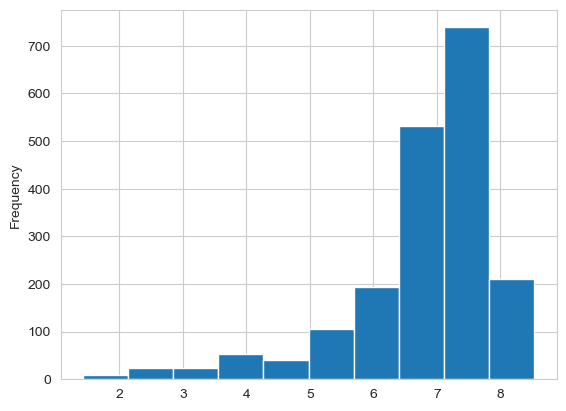

In [254]:
df_env_score['score'].plot(kind='hist')

In [255]:
df_soc_score = score(df_soc_scaled, soc_ind)

<Axes: xlabel='year', ylabel='score'>

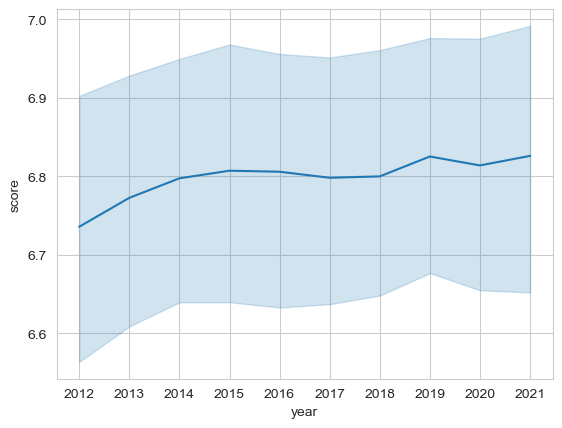

In [256]:
sns.lineplot(data=df_env_score, x='year', y='score')

In [257]:
df_soc_score

ind,iso3,year,EG.ELC.ACCS.ZS,SE.XPD.TOTL.GB.ZS,SH.DYN.MORT,SL.UEM.TOTL.ZS,SP.DYN.LE00.IN,score
0,AFG,2012-01-01,6.809948,3.616873,4.623288,9.660290,3.934988,5.73
1,AFG,2013-01-01,6.726393,3.616873,4.856164,9.664763,4.061602,5.79
2,AFG,2014-01-01,8.916002,3.715852,5.082192,9.666304,4.180151,6.31
3,AFG,2015-01-01,7.057719,3.182448,5.301370,9.666757,4.290636,5.90
4,AFG,2016-01-01,9.762552,3.341085,5.500000,9.665820,4.394401,6.53
...,...,...,...,...,...,...,...,...
1925,ZWE,2017-01-01,4.237119,5.462565,6.219178,9.858416,3.601113,5.88
1926,ZWE,2018-01-01,4.381034,4.962570,6.369863,9.858084,3.704071,5.86
1927,ZWE,2019-01-01,4.505831,4.962570,6.410959,9.856966,3.783373,5.90
1928,ZWE,2020-01-01,5.121768,4.962570,6.431507,9.841312,3.850040,6.04


In [258]:
df_soc_score.describe()

ind,EG.ELC.ACCS.ZS,SE.XPD.TOTL.GB.ZS,SH.DYN.MORT,SL.UEM.TOTL.ZS,SP.DYN.LE00.IN,score
count,1930.000000,1720.000000,1920.000000,1.780000e+03,1840.000000,1930.000000
mean,8.221451,3.675683,8.058451,9.754803e+00,6.540623,6.949155
std,2.760801,1.400628,2.103013,3.101824e-01,2.095004,1.486342
min,0.000000,0.000000,0.000000,-1.776357e-15,0.000000,2.760000
25%,6.880015,2.696917,7.017123,9.690700e+00,5.097433,5.792500
50%,9.946016,3.463889,8.938356,9.820550e+00,6.910088,7.630000
75%,10.000000,4.492152,9.650685,9.887882e+00,8.005192,8.080000
max,10.000000,10.000000,10.000000,1.000000e+01,10.000000,9.490000


<Axes: ylabel='Frequency'>

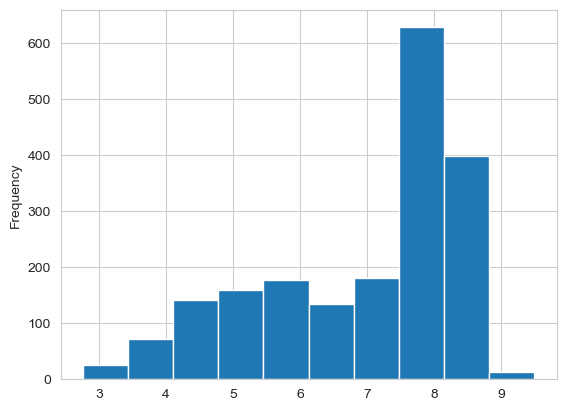

In [259]:
df_soc_score['score'].plot(kind='hist')

<Axes: xlabel='year', ylabel='score'>

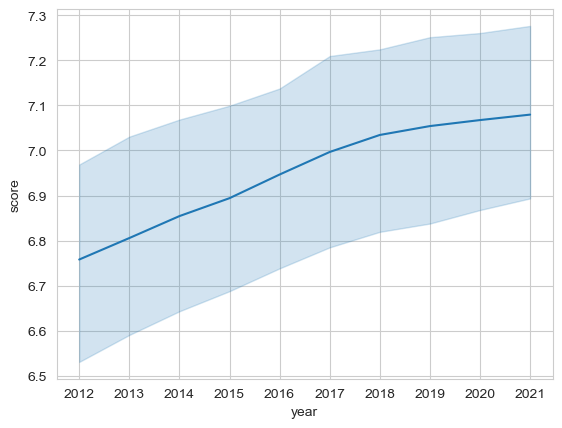

In [260]:
sns.lineplot(data=df_soc_score, x='year', y='score')

In [261]:
df_gov_score = score(df_gov_scaled, gov_ind)

In [262]:
df_gov_score

ind,iso3,year,CC.EST,IT.NET.USER.ZS,PV.EST,RL.EST,VA.EST,score
0,AFG,2012-01-01,1.125786,0.545455,1.248603,1.713569,2.481100,1.42
1,AFG,2013-01-01,1.086896,0.590000,1.034343,1.814017,2.549554,1.41
2,AFG,2014-01-01,1.276325,0.700000,1.264532,2.146961,2.811299,1.64
3,AFG,2015-01-01,1.305576,0.826000,0.924070,2.018856,2.856036,1.59
4,AFG,2016-01-01,0.878958,1.100000,0.711843,2.031174,3.055492,1.56
...,...,...,...,...,...,...,...,...
1925,ZWE,2017-01-01,1.470090,2.440000,4.883350,2.305354,2.662273,2.75
1926,ZWE,2018-01-01,1.563799,2.500000,4.853579,2.527415,2.797454,2.85
1927,ZWE,2019-01-01,1.549991,2.510000,4.349806,2.560978,2.750138,2.74
1928,ZWE,2020-01-01,1.512154,2.930000,4.093730,2.522346,2.846239,2.78


In [263]:
df_gov_score.describe()

ind,CC.EST,IT.NET.USER.ZS,PV.EST,RL.EST,VA.EST,score
count,1910.000000,1920.000000,1930.000000,1930.000000,1930.000000,1930.000000
mean,4.236524,4.981074,6.230693,5.156484,5.533251,5.213596
std,2.306201,2.955971,2.087044,2.162149,2.505796,2.098676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.270000
25%,2.551432,2.268878,4.984696,3.603233,3.464536,3.640000
50%,3.713990,5.114271,6.400353,4.836052,5.703647,5.070000
75%,5.730451,7.602469,8.009004,6.592456,7.737507,6.760000
max,10.000000,10.000000,10.000000,10.000000,10.000000,9.640000


<Axes: ylabel='Frequency'>

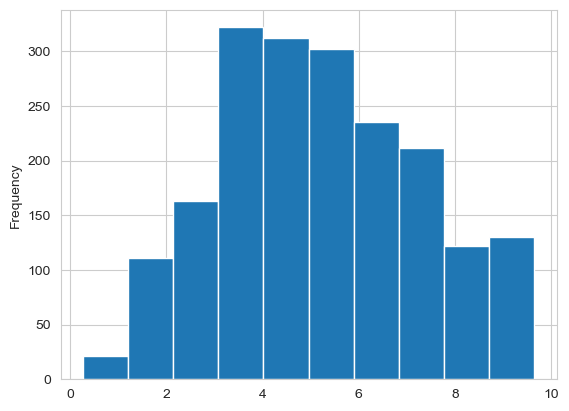

In [264]:
df_gov_score['score'].plot(kind='hist')

<Axes: xlabel='year', ylabel='score'>

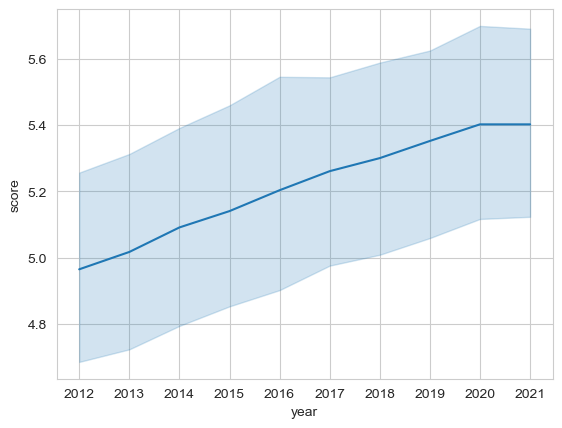

In [265]:
sns.lineplot(data=df_gov_score, x='year', y='score')

In [266]:
print(df_env_score.shape)
print(df_soc_score.shape)
print(df_gov_score.shape)
print(df_env_score.columns)
print(df_soc_score.columns)
print(df_gov_score.columns)

(1930, 10)
(1930, 8)
(1930, 8)
Index(['iso3', 'year', 'AG.LND.FRLS.XD', 'EG.FEC.RNEW.ZS', 'EN.ATM.CO2E.PC',
       'EN.ATM.PM25.MC.M3', 'EN.CLC.WTR.STRS', 'ER.PTD.TOTL.ZS',
       'NY.ADJ.DRES.GN.ZS', 'score'],
      dtype='object', name='ind')
Index(['iso3', 'year', 'EG.ELC.ACCS.ZS', 'SE.XPD.TOTL.GB.ZS', 'SH.DYN.MORT',
       'SL.UEM.TOTL.ZS', 'SP.DYN.LE00.IN', 'score'],
      dtype='object', name='ind')
Index(['iso3', 'year', 'CC.EST', 'IT.NET.USER.ZS', 'PV.EST', 'RL.EST',
       'VA.EST', 'score'],
      dtype='object', name='ind')


### SCORE DATAFRAMES FOR UPLOAD

In [267]:
def drop_ind(df, lst_ind):
    df = df.drop(lst_ind, axis=1)
    return df

In [300]:
df_env_scr = drop_ind(df_env_score, env_ind)
df_soc_scr = drop_ind(df_soc_score, soc_ind)
df_gov_scr = drop_ind(df_gov_score, gov_ind)

In [302]:
df_env_scr = df_env_scr.rename(columns={'score':'env_score'})
df_soc_scr = df_soc_scr.rename(columns={'score':'soc_score'})
df_gov_scr = df_gov_scr.rename(columns={'score':'gov_score'})

In [303]:
print(df_env_scr.head())
print(df_soc_scr.head())
print(df_gov_scr.head())

ind iso3       year  env_score
0    AFG 2012-01-01       6.40
1    AFG 2013-01-01       6.51
2    AFG 2014-01-01       6.60
3    AFG 2015-01-01       6.56
4    AFG 2016-01-01       6.70
ind iso3       year  soc_score
0    AFG 2012-01-01       5.73
1    AFG 2013-01-01       5.79
2    AFG 2014-01-01       6.31
3    AFG 2015-01-01       5.90
4    AFG 2016-01-01       6.53
ind iso3       year  gov_score
0    AFG 2012-01-01       1.42
1    AFG 2013-01-01       1.41
2    AFG 2014-01-01       1.64
3    AFG 2015-01-01       1.59
4    AFG 2016-01-01       1.56


### UPLOAD TO POSTGRES

In [304]:
import psycopg2

In [333]:
schema = 'capstone_travel_index'
engine = sf.get_engine()

In [339]:
# table_name = 'df_gdp_cap'

# if engine!=None:
#     try:
#         gdp_mel.to_sql(name=table_name, # Name of SQL table
#                         con=engine, # Engine or connection
#                         if_exists='replace', # Drop the table before inserting new values 
#                         schema=schema, # Use schmea that was defined earlier
#                         index=False, # Write DataFrame index as a column
#                         chunksize=5000, # Specify the number of rows in each batch to be written at a time
#                         method='multi') # Pass multiple values in a single INSERT clause
#         print(f"The {table_name} table was imported successfully.")
#     # Error handling
#     except (Exception, psycopg2.DatabaseError) as error:
#         print(error)
#         engine = None

The df_gdp_cap table was imported successfully.


___

## IMPORT AND ANALYSIS WITH GDP PER CAPITA IN USD

In [310]:
gdp = pd.read_csv('data/gdp_capita_ud_Data.csv')

In [311]:
gdp = gdp.drop(columns={'Country Name', 'Series Name'})

In [312]:
gdp.head()

,Country Code,Series Code,2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,AFG,NY.GDP.PCAP.CD,621.912310861592,663.141052810937,651.987861948108,628.146803888496,592.476537451681,520.252064031151,530.149830802984,502.056770622973,500.522664145294,516.866552182696,368.754614175459
1,ALB,NY.GDP.PCAP.CD,4437.14261222684,4247.63004748194,4413.06200528903,4578.63320812155,3952.80253807527,4124.05538986272,4531.0193737689,5287.66369446913,5396.21586434732,5332.16047456847,6492.87201224634
2,DZA,NY.GDP.PCAP.CD,5473.2805504316,5610.73089400516,5519.77757552373,5516.23060417242,4197.42136055142,3967.19945122178,4134.93671999429,4171.79501086373,4022.15018374716,3337.25251157504,3690.62787797599
3,ASM,NY.GDP.PCAP.CD,10495.3047320935,11920.0610903131,12038.8715916596,12313.9973571825,13101.5418159165,13300.8246114811,12372.8847825647,13195.9358995539,13672.576657298,15501.5263374397,15743.3107582991
4,AND,NY.GDP.PCAP.CD,51429.1919196159,44904.5800426279,44750.4356804443,45682.2462308595,38885.3760140905,39932.1644867147,40632.4843928243,42903.4435794631,41327.5020305489,37207.4938608348,42137.3272710372


In [313]:
gdp = gdp.rename(columns={'Country Code':'iso3', 
                                        'Series Code':'ind',
                                        '2011 [YR2011]': '2011',
                                        '2012 [YR2012]': '2021',
                                        '2013 [YR2013]': '2013', 
                                        '2014 [YR2014]': '2014', 
                                        '2015 [YR2015]': '2015', 
                                        '2016 [YR2016]':'2016',
                                        '2017 [YR2017]':'2017', 
                                        '2018 [YR2018]':'2018', 
                                        '2019 [YR2019]':'2019', 
                                        '2020 [YR2020]':'2020',
                                        '2021 [YR2021]':'2021'})

In [314]:
gdp_mel = pd.melt(gdp, 
                    id_vars=['iso3', 'ind'], 
                    var_name='year', 
                    value_name='value')

In [315]:
gdp_mel

,iso3,ind,year,value
0,AFG,NY.GDP.PCAP.CD,2011,621.912310861592
1,ALB,NY.GDP.PCAP.CD,2011,4437.14261222684
2,DZA,NY.GDP.PCAP.CD,2011,5473.2805504316
3,ASM,NY.GDP.PCAP.CD,2011,10495.3047320935
4,AND,NY.GDP.PCAP.CD,2011,51429.1919196159
...,...,...,...,...
2976,NaN,NaN,2021,NaN
2977,NaN,NaN,2021,NaN
2978,NaN,NaN,2021,NaN
2979,NaN,NaN,2021,NaN


In [316]:
gdp_mel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2981 entries, 0 to 2980
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   iso3    2926 non-null   object
 1   ind     2926 non-null   object
 2   year    2981 non-null   object
 3   value   2926 non-null   object
dtypes: object(4)
memory usage: 93.3+ KB


In [317]:
gdp_mel['iso3'].nunique()

266

In [318]:
gdp_mel = gdp_mel[gdp_mel['iso3'].isin(list_off)]

In [319]:
gdp_mel['iso3'].nunique()

193

In [320]:
gdp_mel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 0 to 2926
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   iso3    2123 non-null   object
 1   ind     2123 non-null   object
 2   year    2123 non-null   object
 3   value   2123 non-null   object
dtypes: object(4)
memory usage: 82.9+ KB


In [321]:
gdp_mel['year'] = pd.to_datetime(gdp_mel['year'],format='%Y', errors='coerce')

/var/folders/lq/66qmb5qs6yx8s8h1s8rmqnh80000gn/T/ipykernel_3074/2604062279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_mel['year'] = pd.to_datetime(gdp_mel['year'],format='%Y', errors='coerce')


In [322]:
gdp_mel = gdp_mel.rename(columns={'value':'gdp'})

In [323]:
gdp_mel['gdp'] = pd.to_numeric(gdp_mel['gdp'], downcast='float', errors='coerce')

In [324]:
gdp_mel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 0 to 2926
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   iso3    2123 non-null   object        
 1   ind     2123 non-null   object        
 2   year    2123 non-null   datetime64[ns]
 3   gdp     2077 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 82.9+ KB


In [336]:
gdp_mel.drop(columns={'ind'}, inplace=True)

In [338]:
gdp_mel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2123 entries, 0 to 2926
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   iso3    2123 non-null   object        
 1   year    2123 non-null   datetime64[ns]
 2   gdp     2077 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 66.3+ KB


<Axes: ylabel='Frequency'>

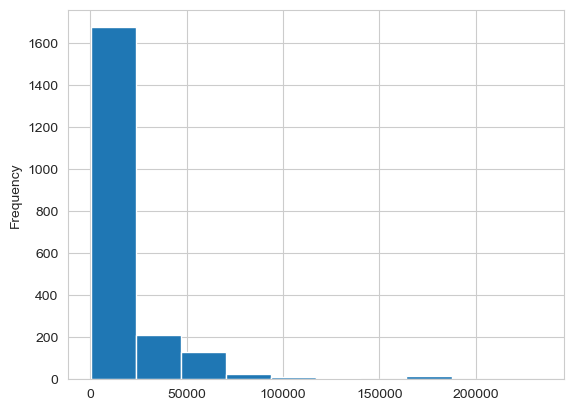

In [337]:
gdp_mel['gdp'].plot(kind='hist')

In [326]:
gov_merge = pd.merge(df_gov_score, gdp_mel[['year', 'iso3', 'gdp']], on=['iso3', 'year'])

<Axes: xlabel='score', ylabel='gdp'>

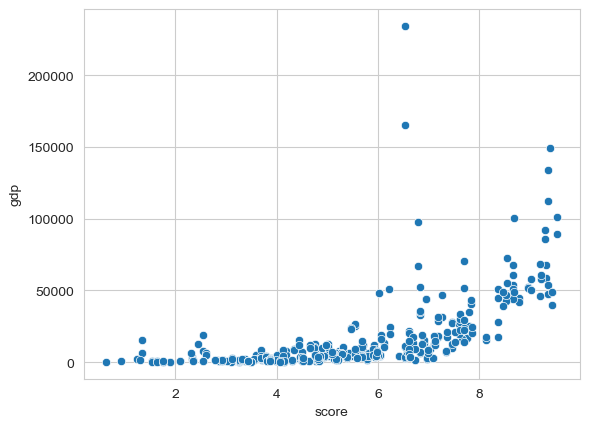

In [327]:
sns.scatterplot(data=gov_merge[gov_merge['year'] == '2021-01-01'], x='score', y='gdp')

In [328]:
soc_merge = pd.merge(df_soc_score, gdp_mel[['year', 'iso3', 'gdp']], on=['iso3', 'year'])

<Axes: xlabel='score', ylabel='gdp'>

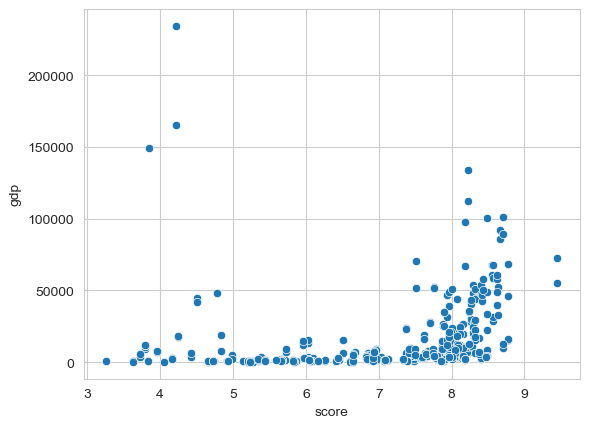

In [329]:
sns.scatterplot(data=soc_merge[soc_merge['year'] == '2021-01-01'], x='score', y='gdp')

In [330]:
env_merge = pd.merge(df_env_score, gdp_mel[['year', 'iso3', 'gdp']], on=['iso3', 'year'])

<Axes: xlabel='score', ylabel='gdp'>

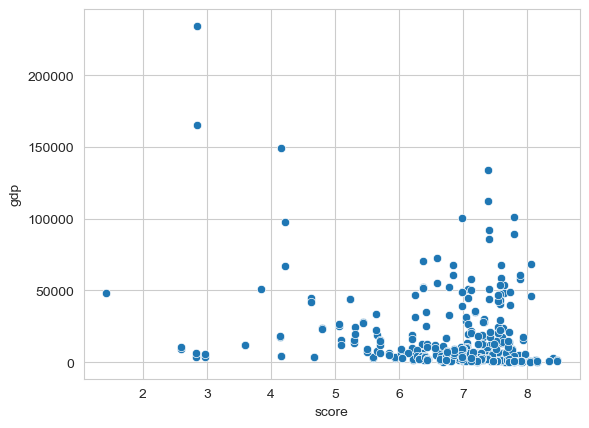

In [331]:
sns.scatterplot(data=env_merge[env_merge['year'] == '2021-01-01'], x='score', y='gdp')

In [332]:
gdp_mel[gdp_mel['gdp'] > 130000]

,iso3,ind,year,gdp
114,LIE,NY.GDP.PCAP.CD,2011-01-01,158611.110489
130,MCO,NY.GDP.PCAP.CD,2011-01-01,179372.763684
385,LIE,NY.GDP.PCAP.CD,2021-01-01,149459.235301
401,MCO,NY.GDP.PCAP.CD,2021-01-01,165505.178100
656,LIE,NY.GDP.PCAP.CD,2013-01-01,173660.161219
672,MCO,NY.GDP.PCAP.CD,2013-01-01,185066.578133
927,LIE,NY.GDP.PCAP.CD,2014-01-01,179457.917926
943,MCO,NY.GDP.PCAP.CD,2014-01-01,195780.006893
1198,LIE,NY.GDP.PCAP.CD,2015-01-01,167805.956932
1214,MCO,NY.GDP.PCAP.CD,2015-01-01,170337.924413
